In [1]:
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2

### 风格设置

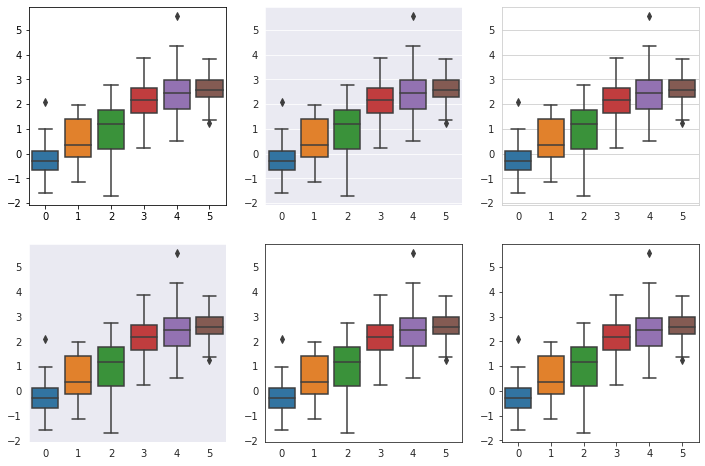

In [3]:
plt.figure(figsize=(12,8))

#默认风格
plt.subplot(231)
sns.boxplot(data=data)

#darkgrid
with sns.axes_style("darkgrid"):
    plt.subplot(232)
    sns.boxplot(data=data)

#whitegrid
with sns.axes_style("whitegrid"):
    plt.subplot(233)
    sns.boxplot(data=data)
    
with sns.axes_style("dark"):
    plt.subplot(234)
    sns.boxplot(data=data)

    #dark    
with sns.axes_style("white"):
    plt.subplot(235)
    sns.boxplot(data=data)

#ticks
with sns.axes_style("ticks"):
    plt.subplot(236)
    sns.boxplot(data=data)

### 颜色

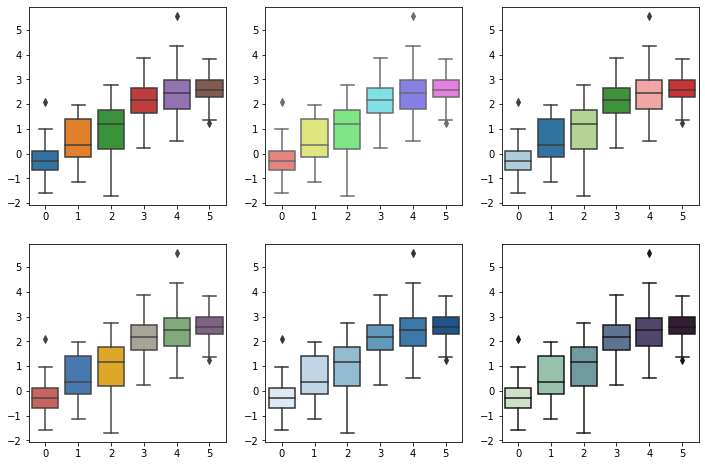

In [4]:
plt.figure(figsize=(12,8))

#默认
plt.subplot(231)
palette=sns.color_palette()
sns.boxplot(data=data,palette=palette)

#设置饱和度；l-亮度 lightness；s-饱和 saturation
plt.subplot(232)
palette=sns.hls_palette(6, l=.7, s=.9)
sns.boxplot(data=data,palette=palette)

#配对对比
plt.subplot(233)
palette=sns.color_palette("Paired",6)
sns.boxplot(data=data,palette=palette)

#使用xkcd颜色来命名颜色
plt.subplot(234)
colors = ["pale red","windows blue", "amber", "greyish", "faded green", "dusty purple"]
palette=sns.xkcd_palette(colors)
sns.boxplot(data=data,palette=palette)

#渐变色
plt.subplot(235)
palette=sns.color_palette("Blues")#想要翻转渐变，可以在面板名称中添加一个_r后缀
sns.boxplot(data=data,palette=palette)

#色调线性变换
plt.subplot(236)
palette=sns.cubehelix_palette(6, start=.75, rot=-.75)
sns.boxplot(data=data,palette=palette)

### 单变量分析

In [1]:
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(color_codes=True)

In [13]:
from scipy import stats, integrate
x = np.random.normal(size=100)

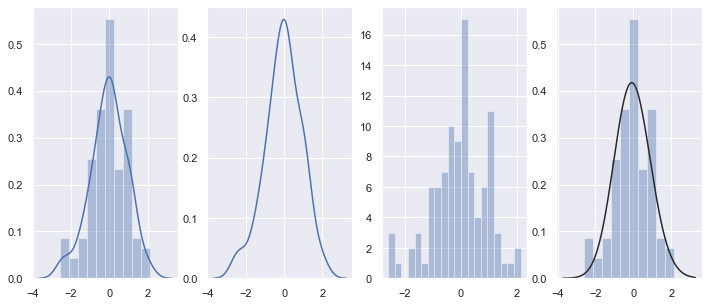

In [16]:
plt.figure(figsize=(12,5))

#默认图形
plt.subplot(141) 
sns.distplot(x)

#不画直方图
plt.subplot(142)
sns.distplot(x,hist=False) 

#不画线图
plt.subplot(143)
sns.distplot(x,kde=False,bins=20) 

#设置fit
plt.subplot(144)
sns.distplot(x, kde=False, fit=stats.gamma)

### 多变量

In [5]:
iris = sns.load_dataset("iris")

In [6]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


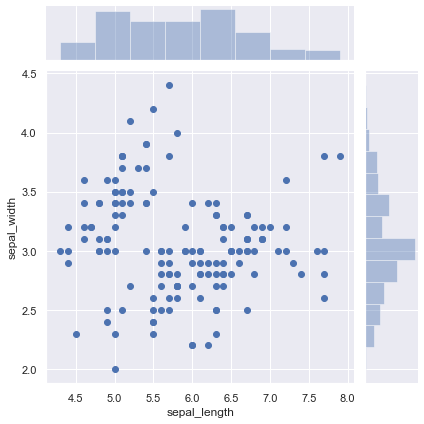

In [25]:

#基本相关性分析
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)

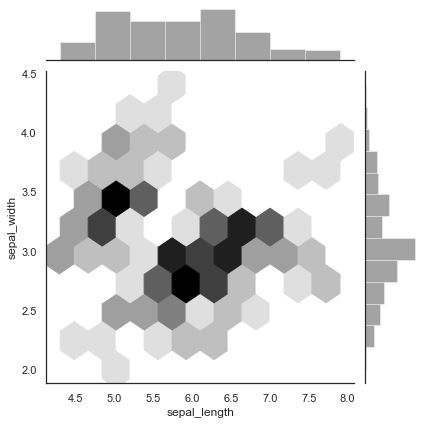

In [10]:
#数据较多时，需要看聚集程度
with sns.axes_style("white"):
    sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="hex", color="k")

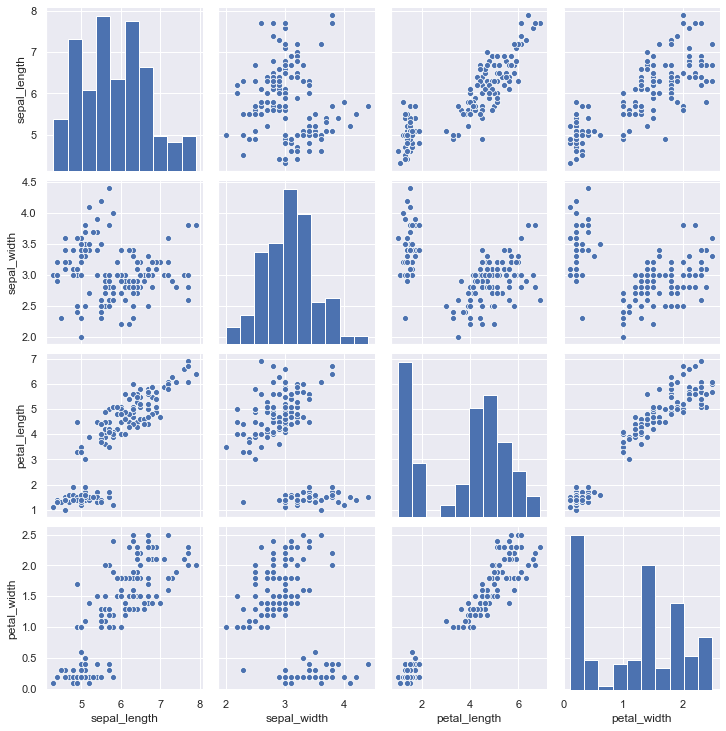

In [11]:
sns.pairplot(iris)

### 分类变量

In [27]:
titanic = sns.load_dataset("titanic")#泰坦尼克数据
tips = sns.load_dataset("tips")#小费数据
iris = sns.load_dataset("iris")#莺尾花数据

##### 树图

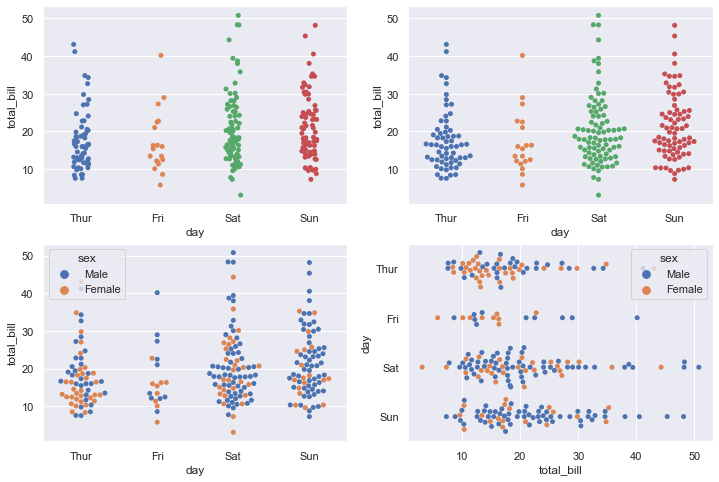

In [31]:
plt.figure(figsize=(12,8))

#基本图
plt.subplot(221)
sns.stripplot(x="day", y="total_bill", data=tips)#如果数据堆叠可以使用 jitter=True

#树图
plt.subplot(222)
sns.swarmplot(x="day", y="total_bill", data=tips)

#查看分类
plt.subplot(223)
sns.swarmplot(x="day", y="total_bill", hue="sex",data=tips)

#横置
plt.subplot(224)
sns.swarmplot(x="total_bill", y="day", hue="sex", data=tips);

##### 盒图、小提琴图

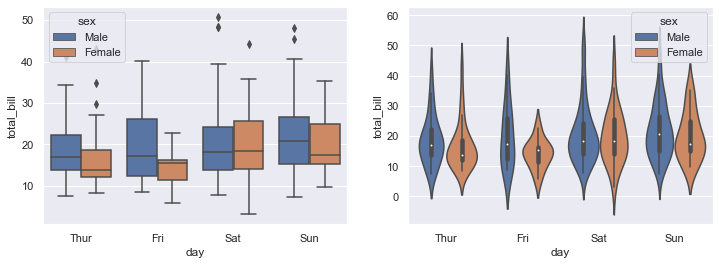

In [36]:
plt.figure(figsize=(12,4))

#盒图
plt.subplot(121)
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips)

#小提琴图
plt.subplot(122)
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips)

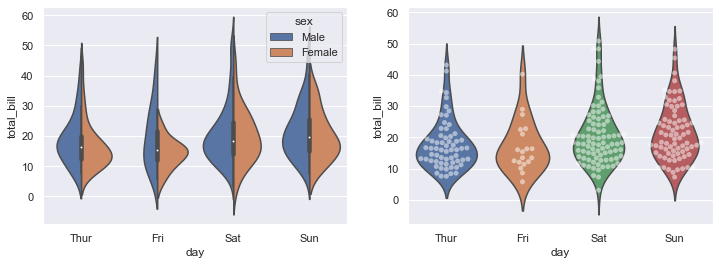

In [37]:
plt.figure(figsize=(12,4))

#在一个小提琴图里绘制变量对比
plt.subplot(121)
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True)

#组合
plt.subplot(122)
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="w", alpha=.5)

##### factorplot

seaborn.factorplot(x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=, ci=95, n_boot=1000, units=None, order=None, hue_order=None, row_order=None, col_order=None, kind='point', size=4, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)



### Parameters： ###

* x,y,hue 数据集变量 变量名
* date 数据集 数据集名
* row,col 更多分类变量进行平铺显示 变量名
* col_wrap 每行的最高平铺数 整数
* estimator 在每个分类中进行矢量到标量的映射 矢量
* ci 置信区间 浮点数或None
* n_boot 计算置信区间时使用的引导迭代次数 整数
* units 采样单元的标识符，用于执行多级引导和重复测量设计 数据变量或向量数据
* order, hue_order 对应排序列表 字符串列表
* row_order, col_order 对应排序列表 字符串列表
* kind : 可选：point 默认, bar 柱形图, count 频次, box 箱体, violin 提琴, strip 散点，swarm 分散点
size 每个面的高度（英寸） 标量
aspect 纵横比 标量
orient 方向 "v"/"h"
color 颜色 matplotlib颜色
palette 调色板 seaborn颜色色板或字典
legend hue的信息面板 True/False
legend_out 是否扩展图形，并将信息框绘制在中心右边 True/False
share{x,y} 共享轴线 True/False

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


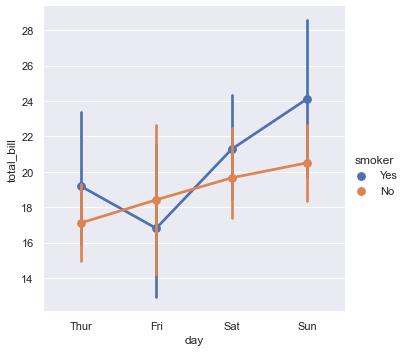

In [40]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips)

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


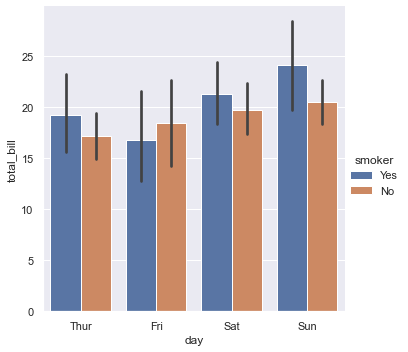

In [42]:

#条形图
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips, kind="bar")

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


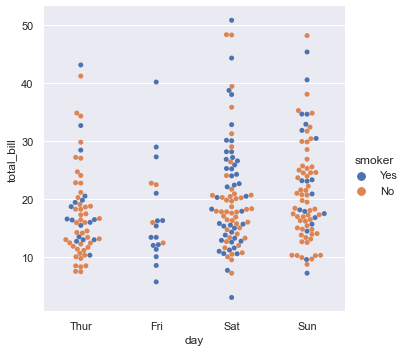

In [44]:
#树图
sns.factorplot(x="day", y="total_bill", hue="smoker",data=tips, kind="swarm")#col="time"可以分列多组

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


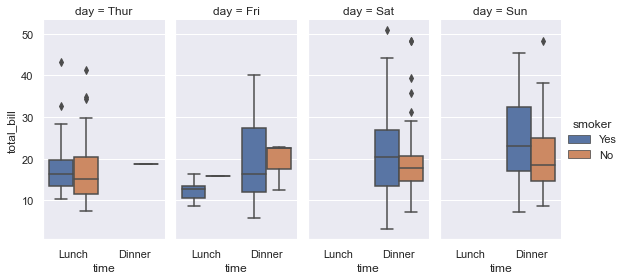

In [49]:
#盒图
sns.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", size=4, aspect=.5)

### 热力图

In [51]:
heat_data = np.random.rand(3, 3)
print (heat_data)

[[0.92983174 0.52843077 0.26555058]
 [0.74733052 0.98652796 0.09873616]
 [0.69736654 0.70983795 0.83417197]]


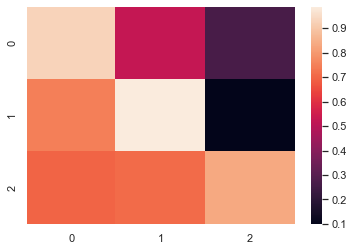

In [52]:
heatmap = sns.heatmap(heat_data)